# Homework 6: Hypothesis Testing and Confidence Intervals  (50 points)



Please complete this notebook by filling in the cells provided.

The solved homework should be uploaded to Gradescope as an .ipynb file. DO NOT put your answers in more than one file or use a different file extension.

**<u>Deadline</u>**:

This assignment is due on **Friday, February 23** at **11:59pm**. Late work will not be accepted unless it follows the specific policy of the instructor.

- Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

- You should start early so that you have time to get help if you're stuck.

- Submit your homework 30-60 minutes to ensure that it will upload before the deadline.

- Please run all of your code cells and ensure all of your answers are outputted and visible to graders.

- Check the file preview on Gradescope to make sure all of your answers are visible.

- Be mindful of your file sizes. Do not print out entire large datasets use .head or .tail instead. Make sure your document is visible in the Gradescope preview.

- Your functions should have a docstring. Points may be taken off for not including a docstring.

- Your graphs should be labeled with a title, x-label, and y-label and be otherwise readable. Intervals on x- and y-axises should make sense for the data. If these items are missing, points may be taken off.

In [1]:
# Don't change this cell; just run it.

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. How Many Devices? (7 points) ##

When a company produces medical devices, it must be sure that its devices will not fail.  Sampling is used ubiquitously in the medical device industry to test how well devices work.

Suppose you work at a company that produces syringes, and you are responsible for ensuring the syringes work well.  After studying the manufacturing process for the syringes, you have a hunch that they have a 2% failure rate.  That is, you suspect that 2% of the syringes won't work when a doctor uses them to inject a patient with medicine.

To test your hunch, you would like to find at least one faulty syringe.  You hire an expert consultant who can test a syringe to check whether it is faulty.  But the expert's time is expensive, so you need to avoid checking more syringes than you need to.

**Important note:** This exercise asks you to compute numbers that are related to probabilities.  For all questions, you can calculate your answer using algebra, **or** you can write and run a simulation to compute an approximately-correct answer (we encourage you to try both).  An answer based on an appropriate simulation will receive full credit.  If you simulate, use at least **10,000** trials. An answer based on algebra, should contain some explanation on how the calculation was done.


**Question 1. (2pts)** Suppose there is indeed a 2% failure rate among all syringes.  If you check 50 syringes chosen at random from among all syringes, what is the chance that you find at least 1 faulty syringe? Name your answer `chance_to_find_syringe`. And display the numerical value you get as an answer. *Hint: first decide what probability distribution this situation follows*

In [3]:
# Algebra
prob_zero_faulty = 1 * (0.02 ** 0) * (0.98 ** 50) 
# number of trials (n = 50) choose k (0) x probability of success (p = 0.02) 
# raised to the k x 1 - p (0.98) to the n - k (50)
chance_to_find_syringe_algebra = 1 - prob_zero_faulty

print(f"The probability you find at least 1 faulty syringe out of 50 chosen at random is {chance_to_find_syringe_algebra}")


The probability you find at least 1 faulty syringe out of 50 chosen at random is 0.6358303199128832


In [4]:
# Simulation
faulty_syringes = np.random.binomial(50, 0.02, 10000)

chance_to_find_syringe_sim = np.mean(faulty_syringes > 0)

print(f"The probability you find at least 1 faulty syringe out of 50 chosen at random is {chance_to_find_syringe_sim}")


The probability you find at least 1 faulty syringe out of 50 chosen at random is 0.6476


*Answer here*

**Question 2. (3pts)** Continue to assume that there really is a 2% failure rate. Find the smallest number of syringes you can check so that you have at least a 75% chance of finding a faulty syringe (your answer should be an integer).  Name that number `num_required_for_75_percent`.  **If you use simulation, it's okay if your answer is off by as many as 5 for full credit.**

In [12]:
target_prob = 0.75
current_prob = 0
syringes = 0  
while current_prob < target_prob:
    syringes += 1
    prob_no_faulty = 0.98 ** syringes 
    current_prob = 1 - prob_no_faulty

num_required_for_75_percent = syringes
num_required_for_75_percent

69

*Answer here*

**Question 3. (2pts)** A doctor purchased 10 syringes and found 3 of them to be faulty. Assuming that there is indeed a 2% failure rate, what was the probability of **exactly 3** out of 10 syringes being faulty?

In [14]:
p_success = 0.02
k_successes = 3
n_trials = 10

prob_three_faulty = (np.math.comb(n_trials, k_successes) *
                              (p_success ** k_successes) *
                              ((1 - p_success) ** (n_trials - k_successes)))

prob_three_faulty

0.0008334005119168512

*Answer here*

## 2. Birth weight data (23 points)

For this question we will use a dataset that contains the following variables for 1,174 mother-baby pairs: the baby’s birth weight in ounces, the number of gestational days, the mother’s age in completed years, the mother’s height in inches, pregnancy weight in pounds, and whether or not the mother smoked during pregnancy.  The code to read the data is in the next cell, and the data file is on Canvas.


In [16]:
baby_df = pd.read_csv('../data/baby.csv')
print(baby_df.shape)
baby_df.head(5)

(1174, 6)


,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


Body Mass Index (BMI) is a person’s weight in kilograms divided by the square of height in meters.  BMI can be used to screen for weight categories that may lead to health problems but it is not diagnostic of the health of an individual. It is becoming a less useful measure by itself: [CNet news on BMI](https://www.cnet.com/health/nutrition/your-bmi-doesnt-matter-as-much-as-you-think-heres-why/)

Here we will investigate differences in BMI between mothers who smoked and did not.

**Question 4. (2 pts)** Calculate the BMI for the mothers in this dataset and save it in a variable called `bmi`

In [19]:
pound_to_kg = 0.453592
inch_to_m = 0.0254

baby_df['bmi'] = ((pound_to_kg * baby_df['Maternal Pregnancy Weight'])/
                 ((inch_to_m * baby_df['Maternal Height']) ** 2))

baby_df.head(10)


,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker,bmi
0,120,284,27,62,100,False,18.290037
1,113,282,33,64,135,False,23.172440
2,128,279,28,64,115,True,19.739486
3,108,282,23,67,125,True,19.577551
4,136,286,25,62,93,False,17.009734
5,138,244,33,62,178,False,32.556265
6,132,245,23,65,140,False,23.296961
7,120,289,25,62,125,False,22.862546
8,143,299,30,66,136,True,21.950731
9,140,351,27,68,120,False,18.245735


**Question 5. (4 pts)** Generate overlapping histograms of mother BMI for smokers and non-smokers. (You should make 2 histograms: one for smokers and one for non-smokers. These should be drawn on the **same plot** so that they overlap.)

Hint: Plot non-smokers first.

Interpret the plots.


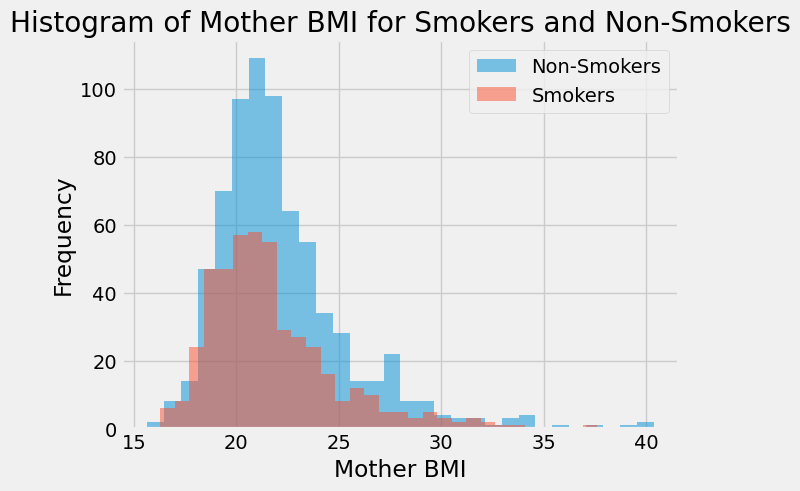

In [24]:
non_smoker_df = baby_df.loc[baby_df['Maternal Smoker'] == False]['bmi']
smoker_df = baby_df.loc[baby_df['Maternal Smoker'] == True]['bmi']

plt.hist(non_smoker_df, bins=30, alpha=0.5, label='Non-Smokers')
plt.hist(smoker_df, bins=30, alpha=0.5, label='Smokers')

plt.xlabel('Mother BMI')
plt.ylabel('Frequency')
plt.title('Histogram of Mother BMI for Smokers and Non-Smokers')
plt.legend()

plt.show()


In [30]:
print(f"The 'non-smoker' dataframe contains {non_smoker_df.shape[0]} mothers.")
print(f"The 'smoker' data frame contains {smoker_df.shape[0]} mothers.")

The 'non-smoker' dataframe contains 715 mothers.
The 'smoker' data frame contains 459 mothers.


*Comment here on the plots:*
At face-value, it seems easy to conclude that smoking mothers (in red) generally have a lower BMI than non-smoking mothers (in blue). If you look at the range between around 17 and 25, it's fairly clear that red's maximum frequency is shifted further to the left than blue's. However, it's hard to make any real conclusions about this data as a result of the sample imbalance in each DF: the 'non-smoker' dataframe contains 715 mothers, while the 'smoker' data frame contains 459 mothers.


**Question 6. (2 pts)** We want to investigate if the distributions of the BMI in mothers who smoke and mothers who do not smoke are the same.

Write the null and alternative hypotheses for this investigation based on the graphs you made above.

**Null Hypothesis:** There is no distinction in the BMI distribution among mothers who smoke and those who do not. The variances noted in the histograms stem from chance fluctuations within the sample.

**Alternative Hypothesis:** There exists a variance in the BMI distribution between smoking and non-smoking mothers. The distinctions noted in the histograms are not random but signify a genuine differentiation within the populations.

**Question 7. (4 pts)** We will use first the following test statistic: **the difference in BMI sample means** (between smokers and non-smokers).  

Write the code that generates a null distribution for this test statistic (using shuffling/permutations) and calculate the p-value associated with this test statistic.


In [41]:
all_bmi_df = np.concatenate([smoker_df, non_smoker_df])
num_permutations = 1000

actual_diff_means = non_smoker_df.mean() - \
                      smoker_df.mean()

permuted_diffs = np.zeros(num_permutations)

for i in range(num_permutations):
    np.random.shuffle(all_bmi)
    perm_smoker_mean = np.mean(all_bmi[:len(smoker_df)])
    perm_non_smoker_mean = np.mean(all_bmi[len(smoker_df):])
    permuted_diffs[i] = perm_smoker_mean - perm_non_smoker_mean

# Calculate p-value
p_value = np.sum(permuted_diffs >= actual_diff_means) / num_permutations

print(f"Observed difference in BMI means: {actual_diff_means}")
print(f"P-value: {p_value}")

Observed difference in BMI means: 0.4946699674377548
P-value: 0.008


**Question 8. (4 pts)** Repeat what is asked in Question 7 for the following test statistic: **the difference in BMI sample medians**.

In [43]:
num_permutations = 1000

actual_diff_medians = non_smoker_df.median() - \
                      smoker_df.median()

permuted_diffs = np.zeros(num_permutations)

for i in range(num_permutations):
    np.random.shuffle(all_bmi)
    perm_smoker_median = np.median(all_bmi[:len(smoker_df)])
    perm_non_smoker_median = np.median(all_bmi[len(smoker_df):])
    permuted_diffs[i] = perm_smoker_median - perm_non_smoker_median

# Calculate p-value
p_value = np.sum(permuted_diffs >= actual_diff_medians) / num_permutations

print(f"Observed difference in BMI medians: {actual_diff_medians}")
print(f"P-value: {p_value}")

Observed difference in BMI medians: 0.4224212549987598
P-value: 0.009


**Question 9. (4 pts)** Repeat what is asked in Question 7 for the following test statistic: **the difference in BMI sample standard deviations**.

In [50]:
num_permutations = 1000

actual_diff_std = non_smoker_df.std() - \
                      smoker_df.std()

permuted_diffs = np.zeros(num_permutations)

for i in range(num_permutations):
    np.random.shuffle(all_bmi)
    perm_smoker_std = np.std(all_bmi[:len(smoker_df)])
    perm_non_smoker_std = np.std(all_bmi[len(smoker_df):])
    permuted_diffs[i] = perm_smoker_std - perm_non_smoker_std

# Calculate p-value
p_value = np.sum(permuted_diffs >= actual_diff_std) / num_permutations

print(f"Observed difference in BMI standard deviations: {actual_diff_std}")
print(f"P-value: {p_value}")


Observed difference in BMI standard deviations: 0.19331575608600948
P-value: 0.215


**Question 10. (3 pts)** Write a very brief discussion on the interpretation of the 3 p-values you calculated.

The results of the permutation tests show statistically significant differences in both the mean and median values of BMI between mothers who smoke and those who do not (p-values: 0.008 and 0.009, respectively). This suggests a true influence of smoking status on BMI. However, the elevated p-value for the difference in standard deviation (0.215) indicates that smoking status doesn't notably affect the variability of BMI among the mothers. This emphasizes a distinct impact of smoking on central BMI measures without significantly altering the overall spread of the distribution.


## 3. Plot the Vote (20 points) ##

The presidential election in the US is coming up this year!! Let's celebrate this with a homework question!

Four candidates are running for President of Dataland. A polling company surveys 1000 people selected uniformly at random from among voters in Dataland, and it asks each one who they are planning on voting for. After compiling the results, the polling company releases the following proportions from their sample:

|Candidate  | Proportion|
|:------------:|:------------:|
|Candidate A | 0.43 |
|Candidate B | 0.35 |
|Candidate C | 0.10 |
|Candidate D | 0.05 |
|Undecided   | 0.07 |

These proportions represent a simple random sample of the population of Dataland. We will attempt to estimate the corresponding *population parameters* - the proportions of each kind of voter in the entire population.  We will use confidence intervals to compute a range of values that reflects the uncertainty of our estimate.

The table `votes` contains the results of the survey. Candidates are represented by their initials. Undecided voters are denoted by `U`.

In [51]:
votes = pd.DataFrame({'vote': np.array(['A']*430 + ['B']*350 + ['C']*100 + ['D']*50 + ['U']*70)})
num_votes = len(votes)
votes.sample(5,replace=True)

,vote
715,B
169,A
302,A
787,C
127,A


Below, we have given you code that will use bootstrapped samples to compute estimates of the true proportion of voters who are planning on voting for **Candidate B**.

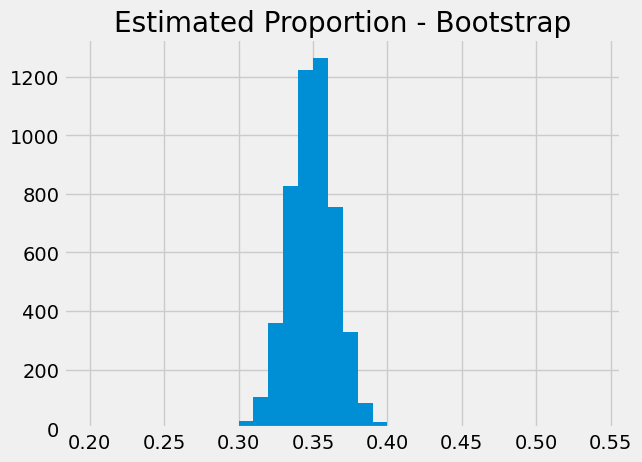

In [52]:
def proportions_in_resamples(nboot):
    statistics = np.array([])
    for i in np.arange(nboot):
        bootstrap = votes.sample(num_votes,replace=True)
        sample_statistic = np.count_nonzero(bootstrap.vote == 'B')/num_votes
        statistics = np.append(statistics, sample_statistic)
    return statistics

sampled_proportions = proportions_in_resamples(5000)

plt.hist(sampled_proportions,bins=np.arange(0.2,0.55,0.01))
plt.title("Estimated Proportion - Bootstrap")
plt.show()

**Question 11. (6pts)** Using the array `sampled_proportions`, compute a **basic boostrap 98% confidence interval** for the difference in the true and bootstrapped proportions of voters planning on voting for candidate B.

In [53]:
b_lower_bound = np.quantile(sampled_proportions, 0.01)
b_upper_bound = np.quantile(sampled_proportions, 0.99)
low_ci = b_lower_bound
up_ci = b_upper_bound
print("Bootstrapped 98% confidence interval for the proportion of B voters in the population: [{:f}, {:f}]".format(low_ci, up_ci))

Bootstrapped 98% confidence interval for the proportion of B voters in the population: [0.315000, 0.385010]


**Question 12. (6pts)** The survey results seem to indicate that Candidate B is losing to Candidate A among voters. We would like to use CI's to determine a range of likely values for Candidate A's true *lead*. Candidate A's lead over Candidate B is:

$$\text{Candidate A's proportion of the vote} - \text{Candidate B's proportion of the vote}.$$

Using the function `proportions_in_resamples` above as a model, use the bootstrap to compute an approximate distribution for Candidate A's lead over Candidate B. Plot a histogram of the the resulting samples.

Also calculate a **95% percentile bootstrap confidence interval** for the difference.

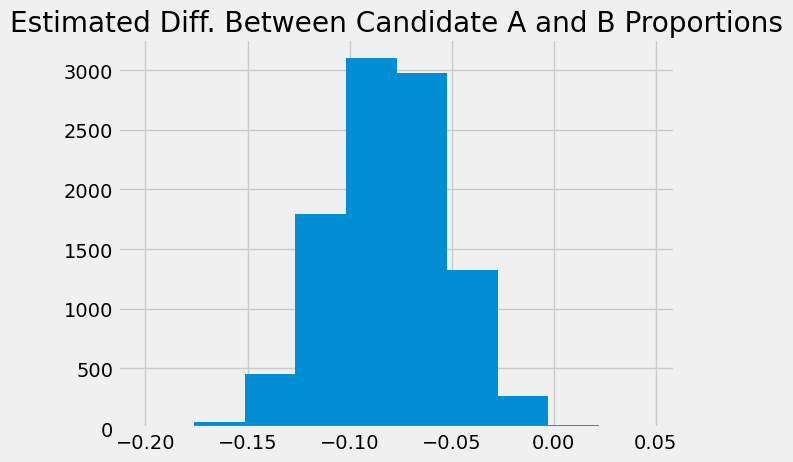

In [78]:
# the code for the histogram is here

def diff_in_resample_votes(nboot):
    '''Calculate the difference in resampled voting statistics using bootstrapping'''
    vote_stats = np.array([])
    for i in np.arange(nboot):
        bootstrap = votes.sample(num_votes,replace=True)
        
        sample_vote_stat = (np.count_nonzero(bootstrap.vote == 'B')/num_votes)-(np.count_nonzero(bootstrap.vote == 'A')/num_votes)
        vote_stats = np.append(vote_stats, sample_vote_stat)
    return vote_stats

sampled_differences = diff_in_resamples(10000)


plt.hist(sampled_differences)
plt.title("Estimated Diff. Between Candidate A and B Proportions")

plt.show()

In [80]:
# the bootstrap confidence interval
diff_lower_bound = np.quantile(sampled_differences, 0.025)
diff_upper_bound = np.quantile(sampled_differences, 0.975)
print("Bootstrapped 95% confidence interval for Candidate A's true lead over Candidate B: [{:f}, {:f}]".format(diff_lower_bound, diff_upper_bound))

Bootstrapped 95% confidence interval for Candidate A's true lead over Candidate B: [-0.135000, -0.026000]


**Question 13. (3pts)** Interpret the 95% interval you obtained. What does it tell you about the lead Candidate A has?

*Answer here:*  The bootstrapped 95% confidence interval for Candidate A's true lead over Candidate B is [-0.135, -0.026]. This interval suggests that we are 95% confident that Candidate A's lead over Candidate B falls within the range of -0.133 to -0.024. Specifically, this indicates that Candidate A is leading over Candidate B by at least 0.024 and at most 0.133. This implies that, based on the data and the method of estimation, Candidate A's lead is substantial and likely to persist. However, it's essential to acknowledge that there is still uncertainty associated with the estimation, and the actual lead may vary within this interval.

**Question 14. (3pts)** Suppose your friend computes the following 99% confidence interval for the proportion of Candidate B voters:

$$[.41, .49]$$

(If you do this yourself, your answer might be different; that doesn't mean it is wrong.)

Can we say that 99% of the population lies in the range $[.41, .49]$? Explain your answer.

No, we cannot say that 99% of the population lies in the range [.41, .49] based solely on the 99% confidence interval computed by my friend. The 99% confidence interval [.41, .49] means that if we were to take multiple samples from the population and compute confidence intervals for the proportion of Candidate B voters using each sample, approximately 99% of those intervals would contain the true proportion of Candidate B voters in the population. However, the 99% confidence level refers to the likelihood that the procedure used to construct the interval will produce intervals containing the true population proportion in 99% of such intervals. It does not directly imply a statement about the proportion of the population itself. 


**Question 15. (2pts)** Suppose we produced 10,000 new samples (each one a uniform random sample of 1,000 voters) and created a 99% confidence interval from each one. Roughly how many of those 10,000 intervals do you expect will actually contain the true proportion of the population?

If we were to generate 10,000 new samples, each consisting of 1,000 voters selected uniformly at random, and then construct a 99% confidence interval from each sample, we would anticipate that approximately 9,900 of these 10,000 intervals would encompass the true proportion of the population. This anticipation stems from the definition of a confidence interval, wherein a 99% confidence level indicates that if numerous samples were taken and confidence intervals were calculated from each, roughly 99% of those intervals would capture the true population parameter. Consequently, out of 10,000 such confidence intervals, around 99%, or 9,900 of them, are projected to contain the true proportion of voters for any given candidate or outcome within the population of Dataland.